# Processing surfaces and points in napari - from python
[napari-process-points-and-surfaces](https://github.com/haesleinhuepf/napari-process-points-and-surfaces) (nppas) allows post-processing of surface and point cloud data. The available functionality uses [vedo](http://vedo.embl.es/) in the background.

In [1]:
import napari_process_points_and_surfaces as nppas

import napari
import numpy as np
from skimage.measure import label

In [2]:
viewer = napari.Viewer(ndisplay=3)

def hide_all(viewer):
    for layer in viewer.layers:
        layer.visible = False
        
def show_all(viewer):
    for layer in viewer.layers:
        layer.visible = True

In [3]:
from skimage.data import cells3d
nuclei = cells3d()[:,1,60:120,30:80]
nuclei.shape

(60, 60, 50)

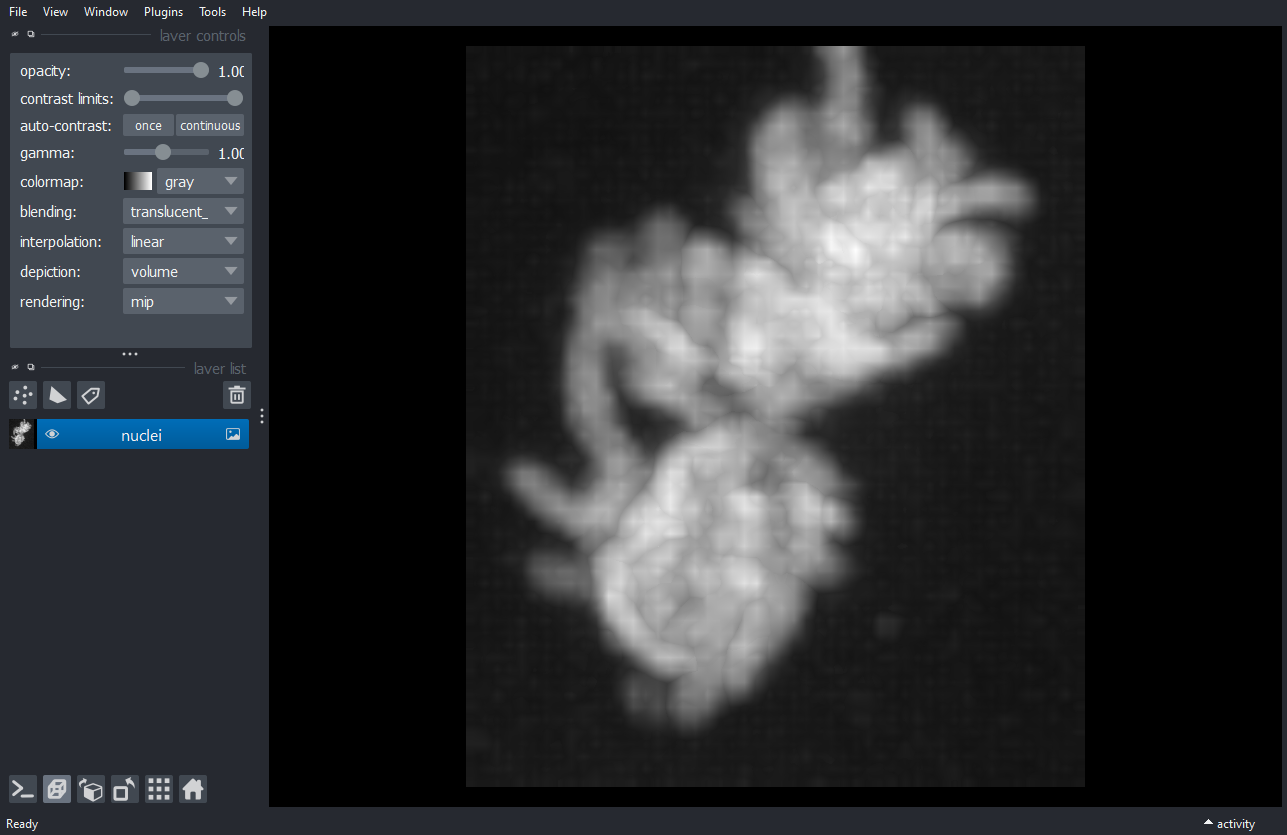

In [4]:
viewer.add_image(nuclei)

napari.utils.nbscreenshot(viewer)

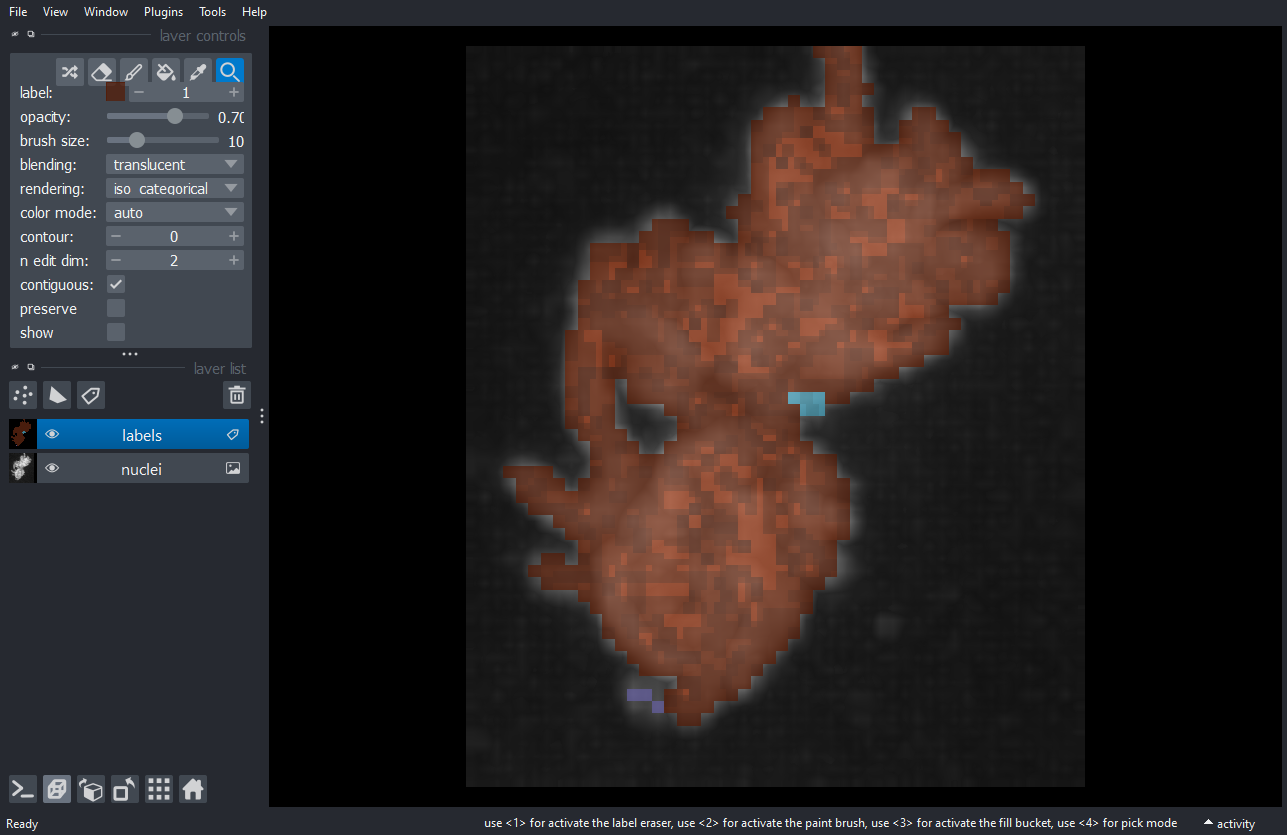

In [5]:
labels = label(nuclei>20000)

viewer.add_labels(labels)

napari.utils.nbscreenshot(viewer)

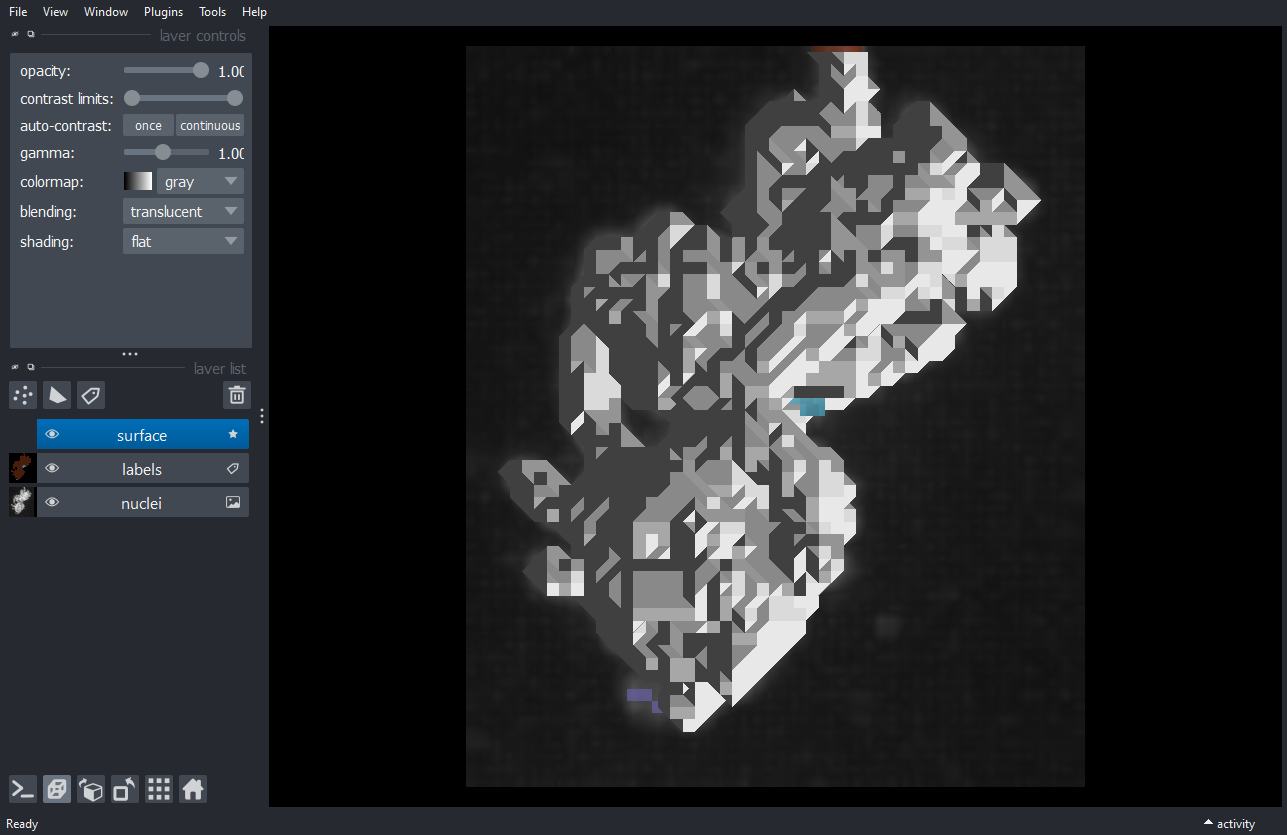

In [6]:
surface = nppas.largest_label_to_surface(labels)

surface_layer = viewer.add_surface(surface, blending='translucent', shading='flat')

napari.utils.nbscreenshot(viewer)

## Surface filtering

We can filter and smooth surfaces, e.g. smooth them.

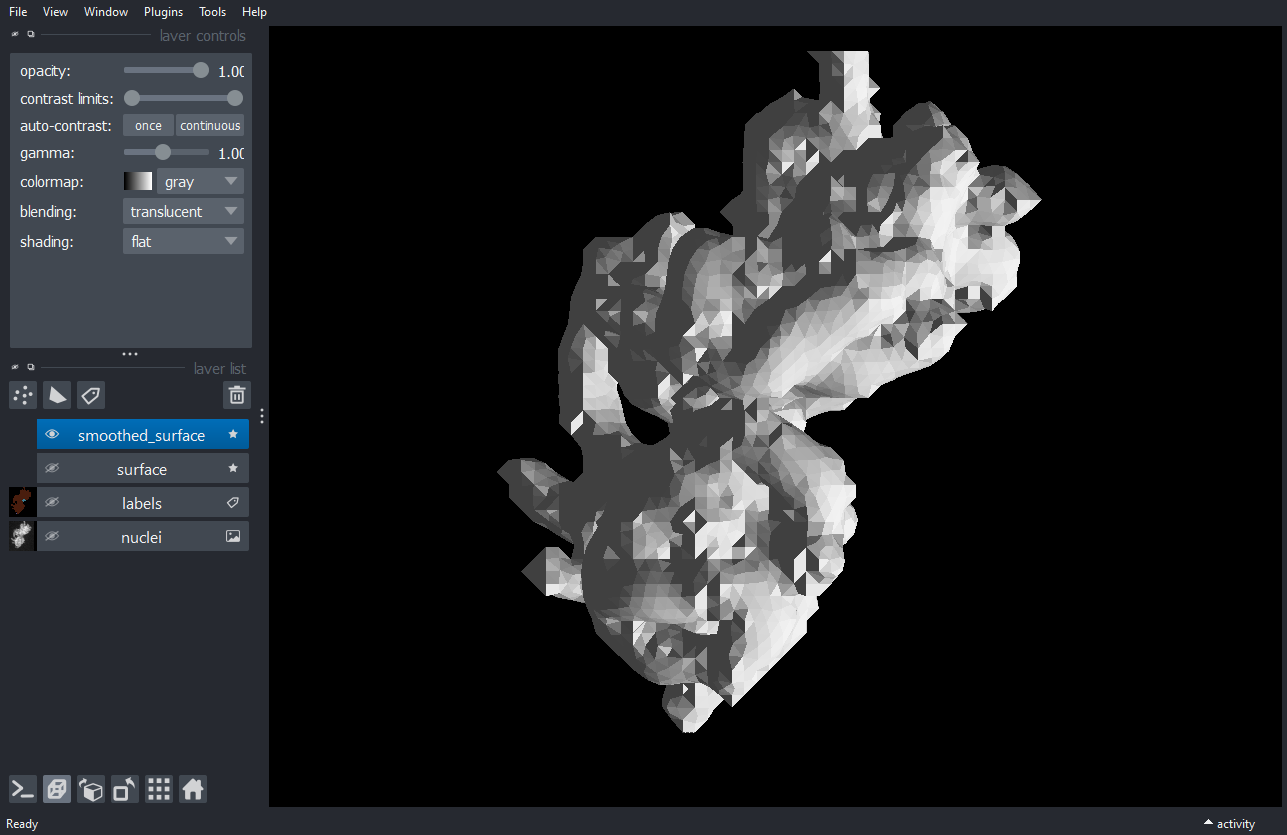

In [7]:
hide_all(viewer)

smoothed_surface = nppas.smooth_surface(surface)
viewer.add_surface(smoothed_surface)

napari.utils.nbscreenshot(viewer)

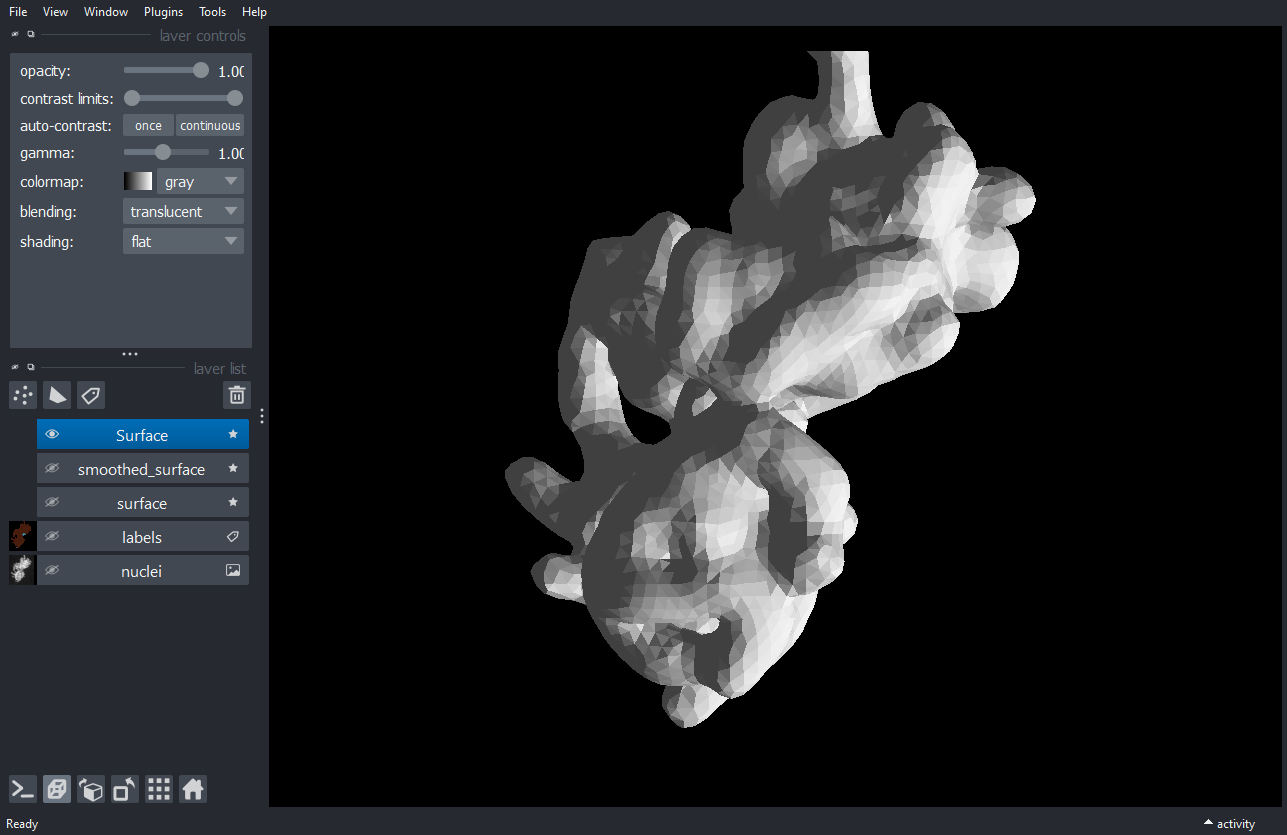

In [8]:
hide_all(viewer)

viewer.add_surface(nppas.smooth_surface(surface, feature_angle=360))

napari.utils.nbscreenshot(viewer)

## Surface subdivision
To add vertices to a surface, you can subdivide it.

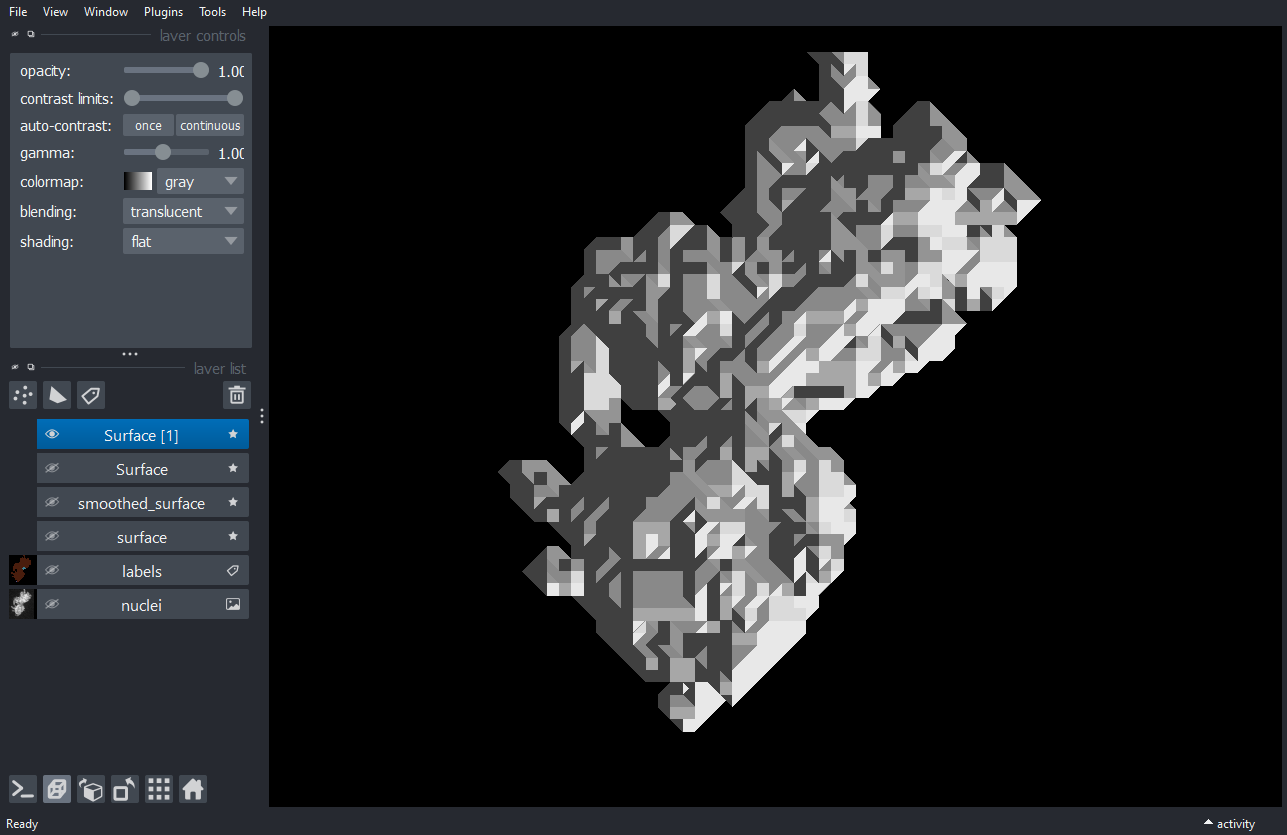

In [9]:
hide_all(viewer)

viewer.add_surface(nppas.subdivide_adaptive(surface))

napari.utils.nbscreenshot(viewer)

## Point clouds

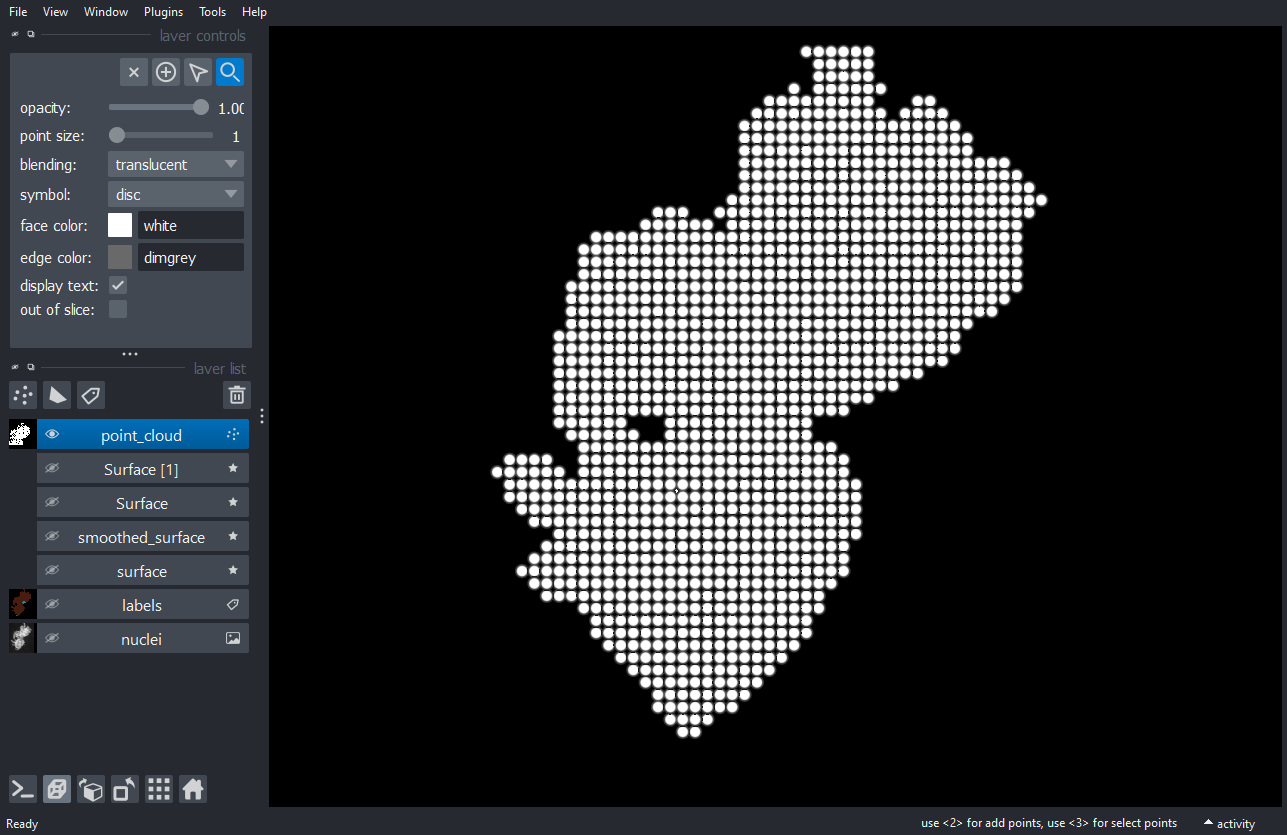

In [10]:
hide_all(viewer)
    
point_cloud = nppas.sample_points_from_surface(surface, distance_fraction=0.01)

points_layer = viewer.add_points(point_cloud, size=1)

napari.utils.nbscreenshot(viewer)

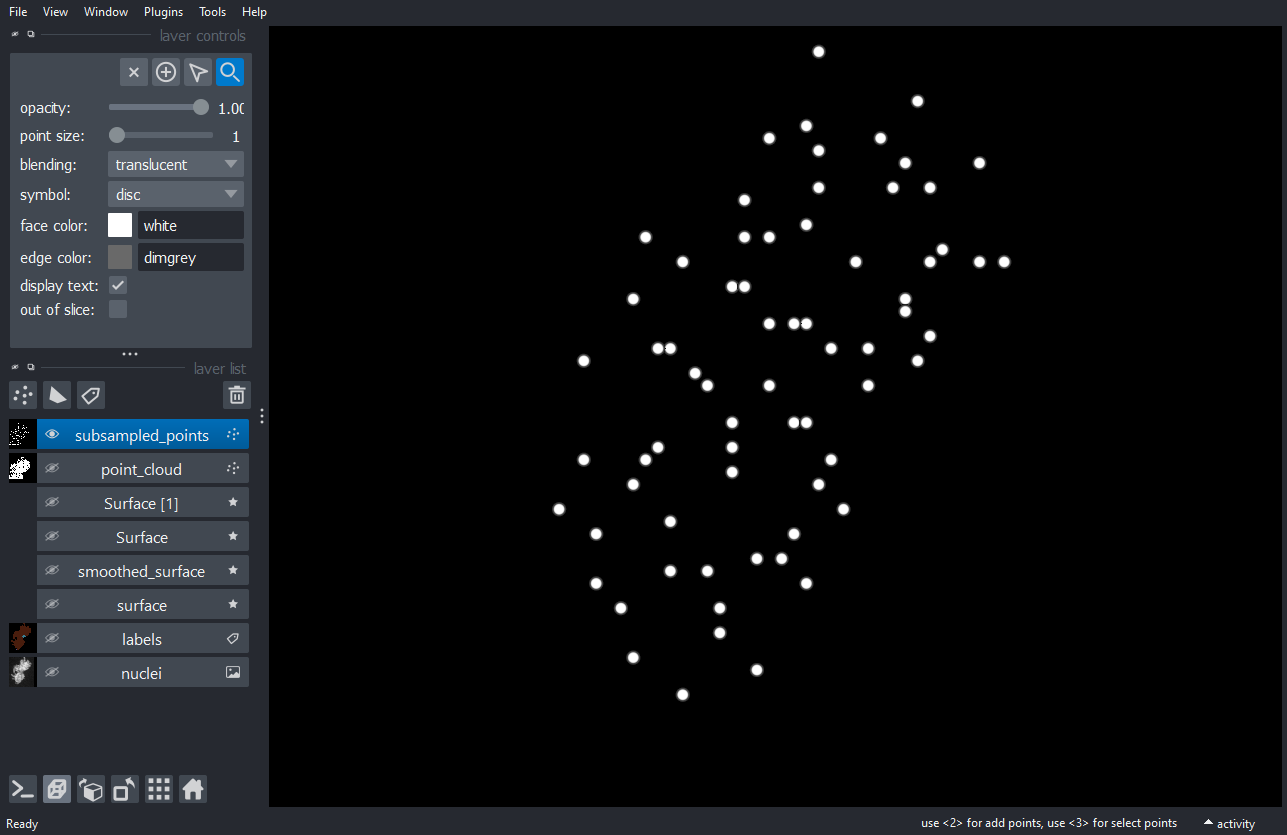

In [11]:
hide_all(viewer)
    
subsampled_points = nppas.subsample_points(points_layer.data, distance_fraction=0.1)

viewer.add_points(subsampled_points, size=1)

napari.utils.nbscreenshot(viewer)

## From points to labels

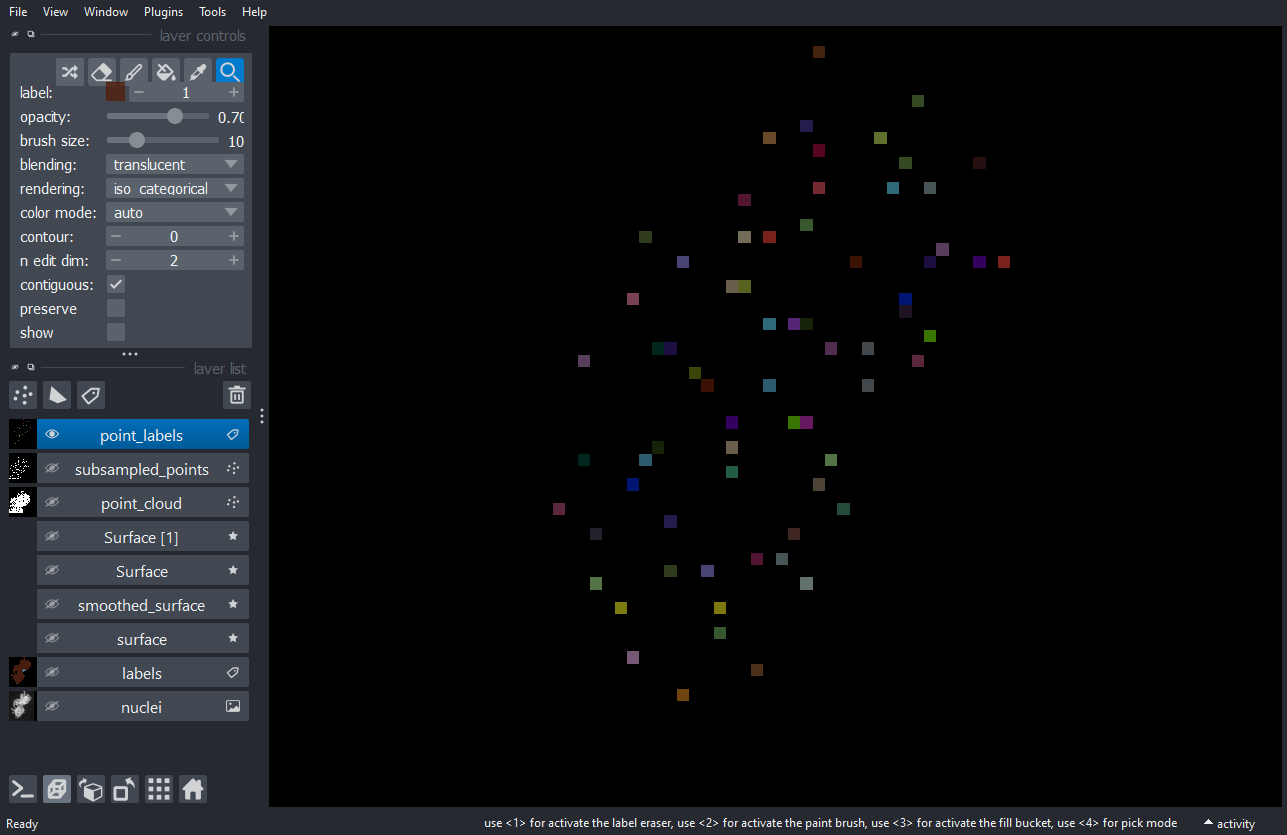

In [12]:
hide_all(viewer)

point_labels = nppas.points_to_labels(subsampled_points, labels)

viewer.add_labels(point_labels)

napari.utils.nbscreenshot(viewer)

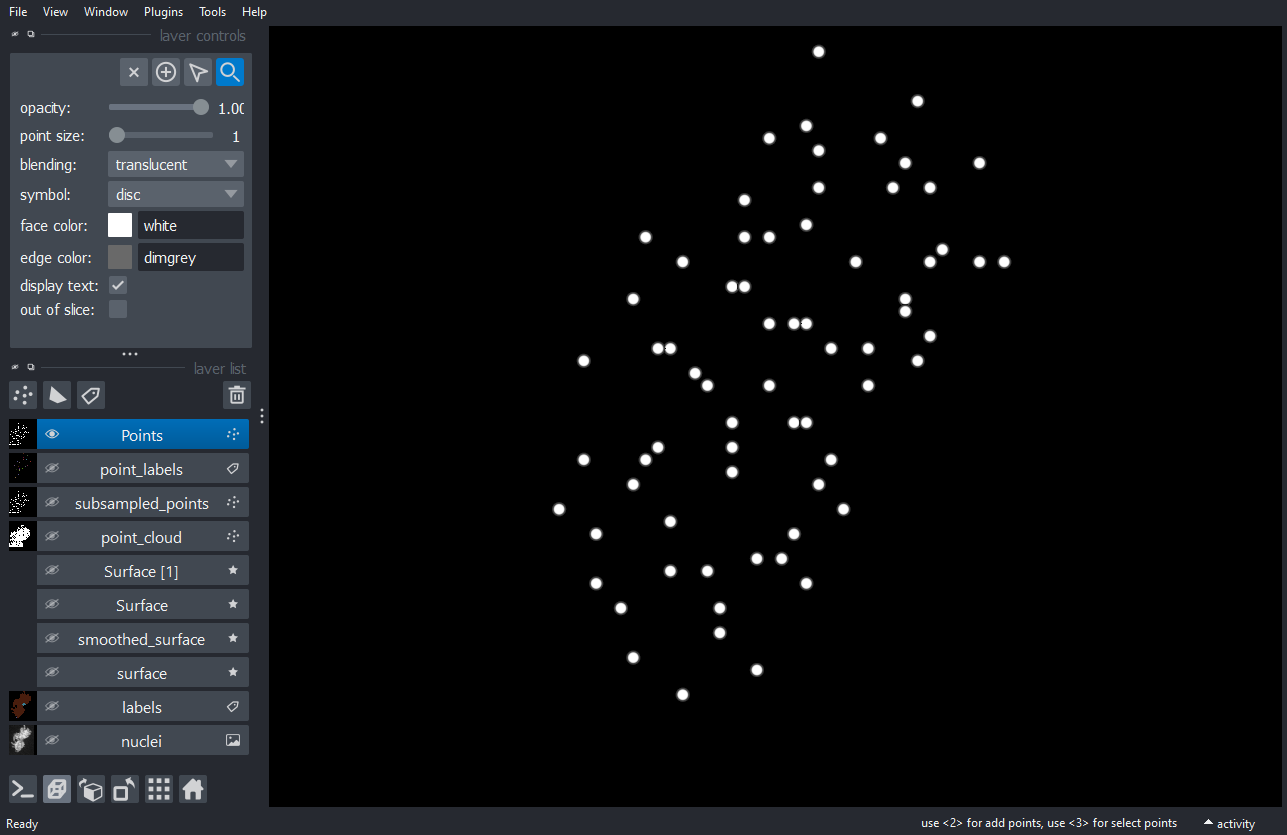

In [13]:
hide_all(viewer)

centroids = nppas.labels_to_centroids(point_labels, viewer=viewer)
viewer.add_points(centroids, size=1)

napari.utils.nbscreenshot(viewer)

In [14]:
centroids

[(20.0, 17.0, 31.0),
 (20.0, 22.0, 24.0),
 (21.0, 17.0, 17.0),
 (21.0, 30.0, 21.0),
 (21.0, 38.0, 16.0),
 (22.0, 33.0, 29.0),
 (22.0, 41.0, 25.0),
 (24.0, 24.0, 32.0),
 (24.0, 45.0, 12.0),
 (25.0, 15.0, 24.0),
 (25.0, 24.0, 15.0),
 (25.0, 47.0, 20.0),
 (26.0, 9.0, 35.0),
 (26.0, 17.0, 37.0),
 (27.0, 32.0, 15.0),
 (28.0, 27.0, 24.0),
 (29.0, 37.0, 30.0),
 (30.0, 39.0, 10.0),
 (31.0, 11.0, 28.0),
 (31.0, 25.0, 36.0),
 (31.0, 41.0, 23.0),
 (31.0, 49.0, 13.0),
 (32.0, 9.0, 41.0),
 (32.0, 19.0, 22.0),
 (32.0, 50.0, 23.0),
 (34.0, 0.0, 28.0),
 (34.0, 32.0, 21.0),
 (35.0, 16.0, 38.0),
 (35.0, 24.0, 29.0),
 (35.0, 42.0, 16.0),
 (36.0, 7.0, 33.0),
 (37.0, 7.0, 24.0),
 (37.0, 35.0, 28.0),
 (38.0, 35.0, 13.0),
 (38.0, 43.0, 27.0),
 (38.0, 52.0, 17.0),
 (39.0, 23.0, 37.0),
 (39.0, 26.0, 18.0),
 (40.0, 15.0, 22.0),
 (41.0, 43.0, 10.0),
 (42.0, 11.0, 37.0),
 (42.0, 34.0, 21.0),
 (42.0, 45.0, 20.0),
 (43.0, 17.0, 43.0),
 (43.0, 22.0, 26.0),
 (44.0, 8.0, 28.0),
 (46.0, 4.0, 36.0),
 (46.0, 20.0, 13.0),

## From points to surfaces

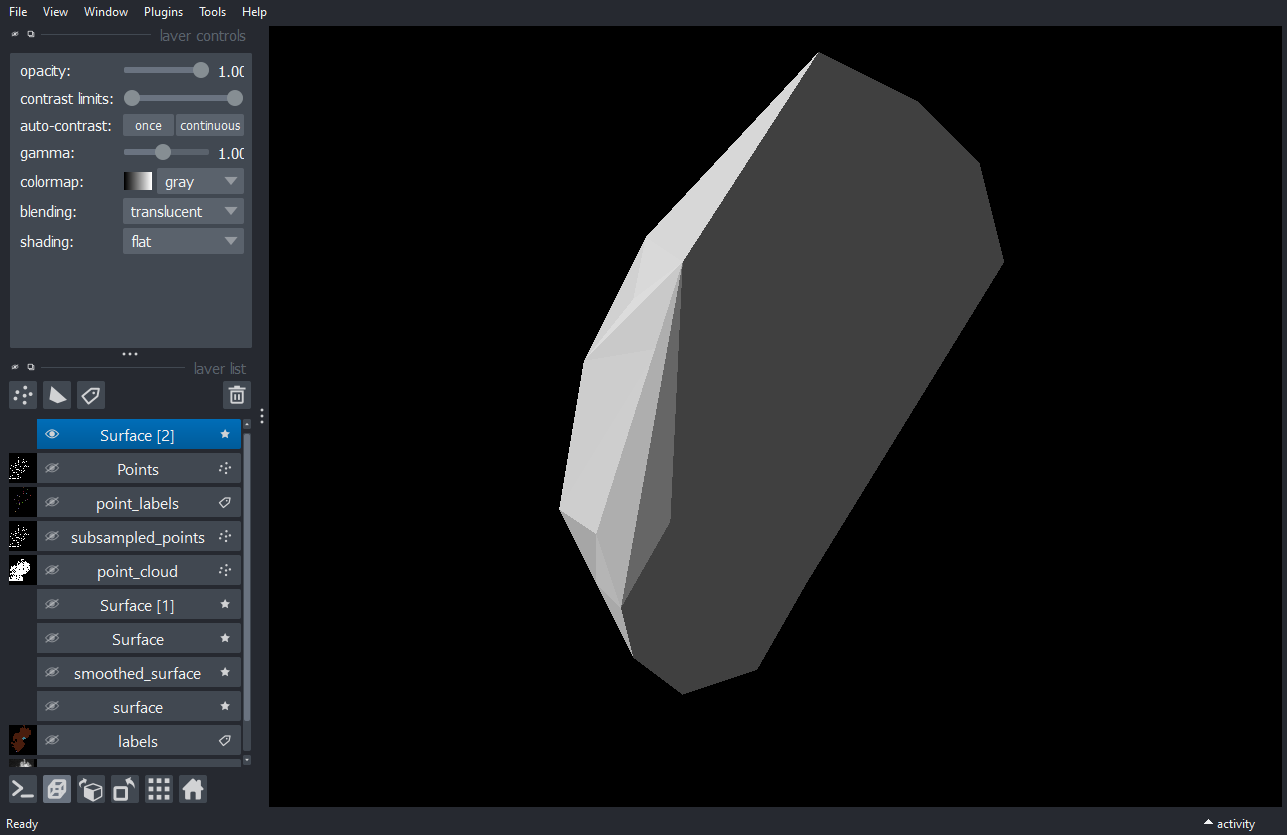

In [15]:
hide_all(viewer)

viewer.add_surface(nppas.create_convex_hull_from_points(centroids))

napari.utils.nbscreenshot(viewer)

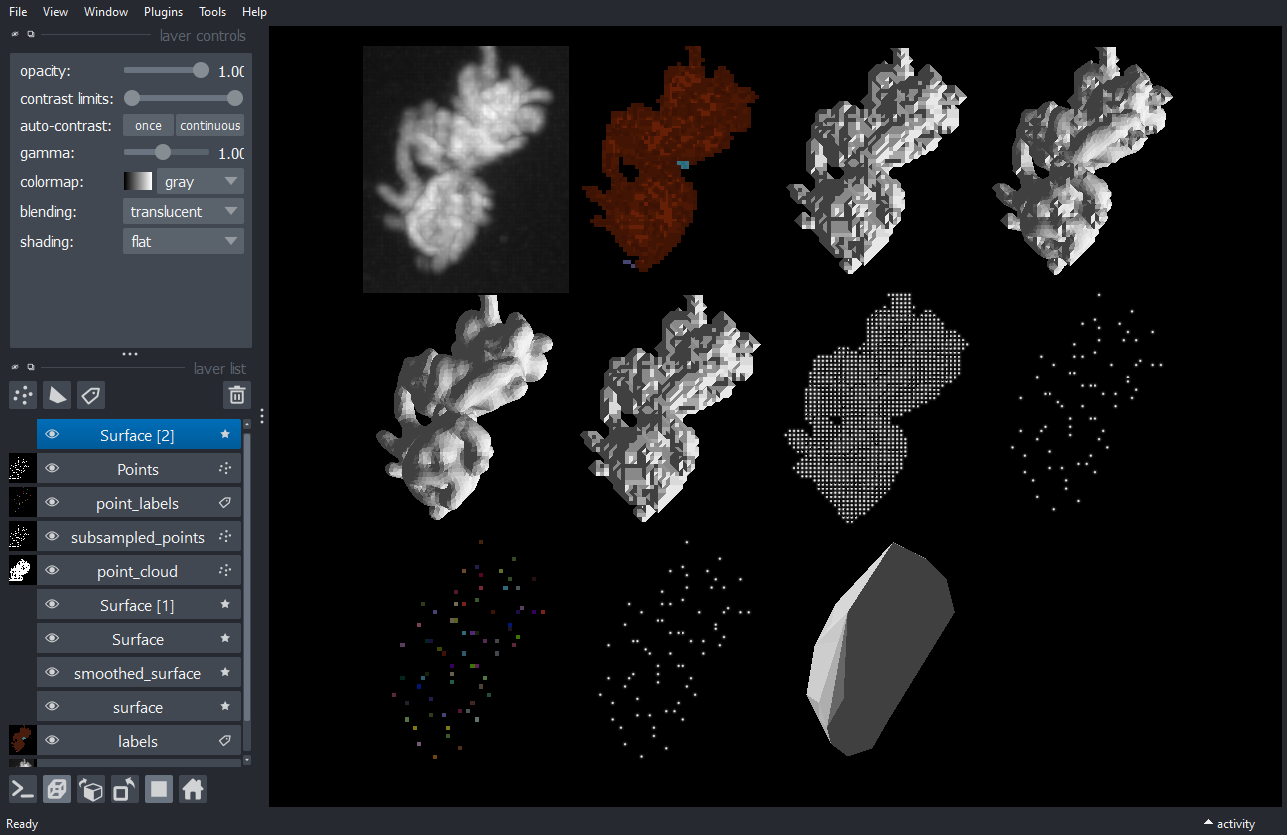

In [16]:
show_all(viewer)

viewer.grid.enabled = True
viewer.grid.stride = -1

napari.utils.nbscreenshot(viewer)